## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


## Loading the Data

In [2]:

file_path = r"C:\Users\Srimanth Madira\Downloads\CAR DETAILS.csv"



## Cleaning the Data

In [3]:

import pandas as pd

# Step 1: Load the data
try:
    file_path = r"C:\Users\Srimanth Madira\Downloads\CAR DETAILS.csv"  # Update the file path if necessary
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
    raise

# Step 2: Check for missing values
missing_values = df.isnull().sum()

# Step 3: Check and convert data types if necessary
data_types = df.dtypes

# Step 4: Identify outliers in numerical columns using the IQR method
if 'selling_price' in df.columns:
    Q1 = df['selling_price'].quantile(0.25)
    Q3 = df['selling_price'].quantile(0.75)
    IQR = Q3 - Q1
    outlier_condition = (df['selling_price'] < (Q1 - 1.5 * IQR)) | (df['selling_price'] > (Q3 + 1.5 * IQR))
else:
    outlier_condition = None
    print("'selling_price' column not found in the dataset.")

# Step 5: Check consistency of categorical values
unique_fuels = df['fuel'].unique() if 'fuel' in df.columns else []
unique_seller_types = df['seller_type'].unique() if 'seller_type' in df.columns else []
unique_owners = df['owner'].unique() if 'owner' in df.columns else []

# Step 6: Remove duplicates
duplicates = df.duplicated().sum()

# Display the results
print("Missing values per column:")
print(missing_values)
print("\nData types:")
print(data_types)
print("\nNumber of outliers in 'selling_price':", outlier_condition.sum() if outlier_condition is not None else "N/A")
print("\nUnique values in 'fuel':", unique_fuels)
print("\nUnique values in 'seller_type':", unique_seller_types)
print("\nUnique values in 'owner':", unique_owners)
print("\nNumber of duplicate rows:", duplicates)


The file was not found. Please check the file path.


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Srimanth Madira\\Downloads\\CAR DETAILS.csv'

## Explorotary Data Analysis

In [ ]:

# Set up the data again (if necessary)
data =df


df = pd.DataFrame(data)

# Step 1: Count the number of cars per year
car_counts = df['year'].value_counts().sort_index()

# Step 2: Visualize the counts
plt.figure(figsize=(10, 6))
sns.barplot(x=car_counts.index, y=car_counts.values, palette='viridis')
plt.title('Number of Cars Listed by Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Display the counts
print("Number of cars listed by year:")
print(car_counts)


Data loaded successfully!


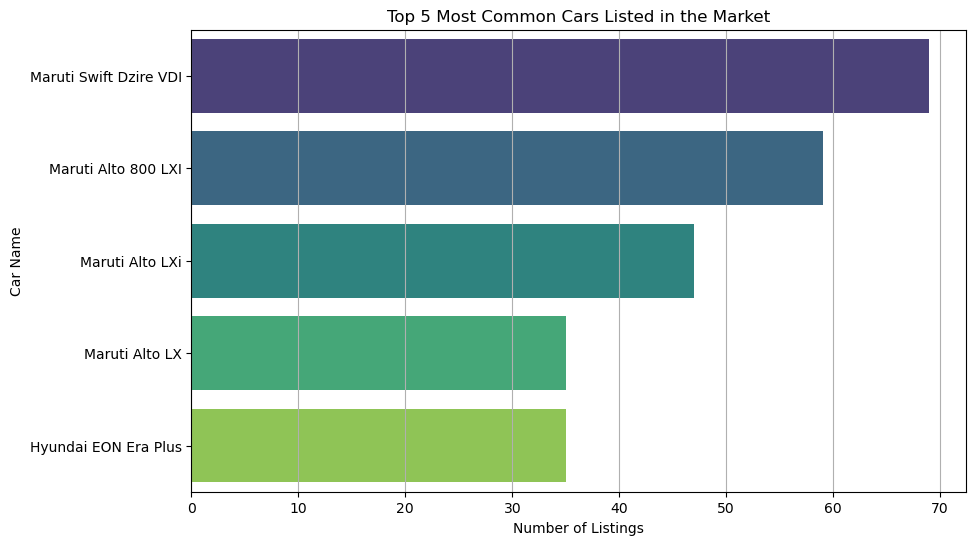

Number of listings for the top 5 cars:
Maruti Swift Dzire VDI    69
Maruti Alto 800 LXI       59
Maruti Alto LXi           47
Maruti Alto LX            35
Hyundai EON Era Plus      35
Name: name, dtype: int64


In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
try:
    file_path = r"C:\Users\LENOVO\Downloads\CAR DETAILS.csv"  # Update the path
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
    raise

# Step 1: Count the occurrences of each car name
if 'name' in df.columns:
    car_counts = df['name'].value_counts()

    # Step 2: Get the top 5 cars
    top_5_cars = car_counts.head(5)

    # Step 3: Visualize the top 5 cars
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_5_cars.values, y=top_5_cars.index, palette='viridis')
    plt.title('Top 5 Most Common Cars Listed in the Market')
    plt.xlabel('Number of Listings')
    plt.ylabel('Car Name')
    plt.grid(axis='x')
    plt.show()

    # Display the counts of the top 5 cars
    print("Number of listings for the top 5 cars:")
    print(top_5_cars)
else:
    print("'name' column not found in the dataset. Please check the file.")


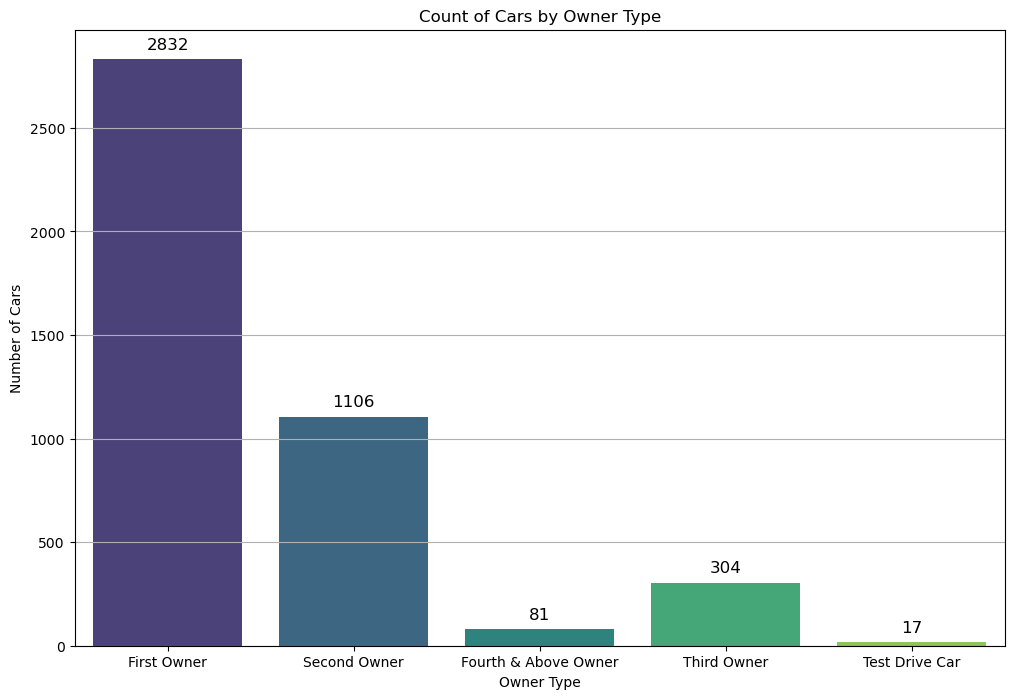

Number of cars for each owner type:
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64


In [10]:


# Sample DataFrame setup (as per your previous data)
data =df
df = pd.DataFrame(data)

# Step 1: Count the occurrences of each owner type
owner_counts = df['owner'].value_counts()

# Step 2: Visualize the owner types
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='owner', data=df, palette='viridis')
plt.title('Count of Cars by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Number of Cars')
plt.grid(axis='y')

# Step 3: Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()

# Display the counts
print("Number of cars for each owner type:")
print(owner_counts)


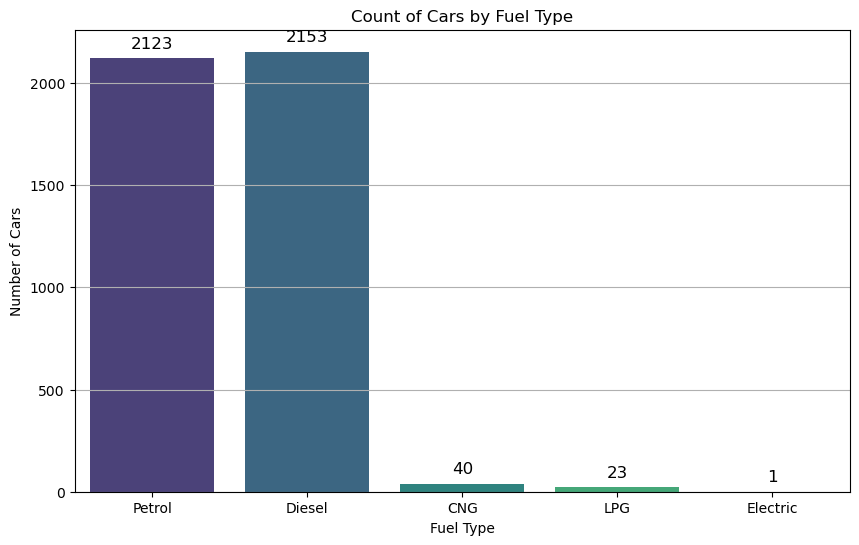

In [11]:
# Count of Cars by Fuel Type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='fuel', data=df, palette='viridis')
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Cars')
plt.grid(axis='y')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()



Average Selling Price by Owner Type

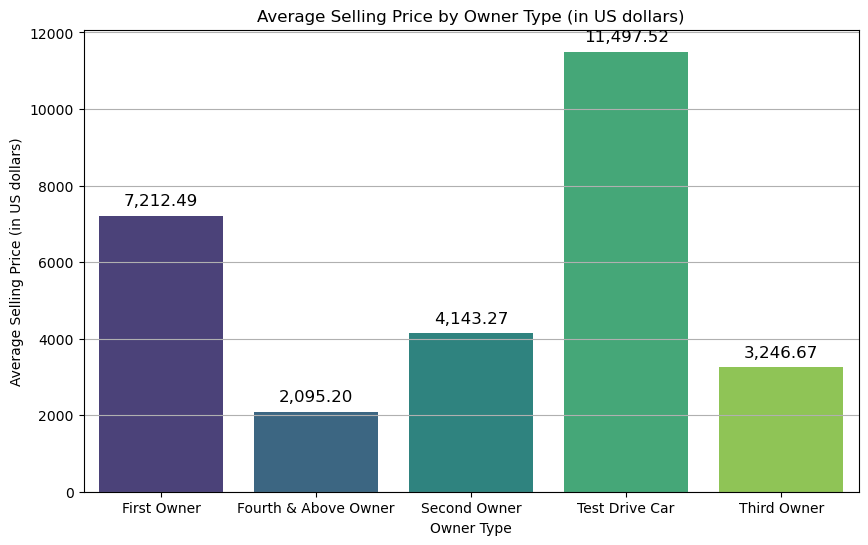

In [12]:
# Average Selling Price by Owner Type
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame setup (as per your previous data)
data = df
df = pd.DataFrame(data)

# Convert selling price to US dollars by dividing by 83
df['selling_price_usd'] = df['selling_price'] / 83

# Average Selling Price by Owner Type
plt.figure(figsize=(10, 6))
avg_price_owner = df.groupby('owner')['selling_price_usd'].mean().reset_index()
ax = sns.barplot(x='owner', y='selling_price_usd', data=avg_price_owner, palette='viridis')
plt.title('Average Selling Price by Owner Type (in US dollars)')
plt.xlabel('Owner Type')
plt.ylabel('Average Selling Price (in US dollars)')
plt.grid(axis='y')

# Annotate the bars with their average selling prices
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()




Count of Cars by Transmission Type

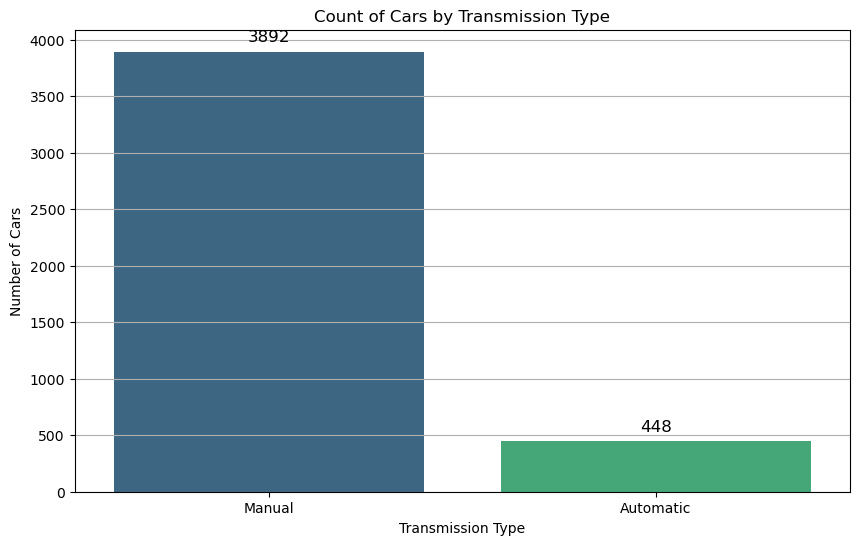

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of Cars by Transmission Type
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='transmission', data=df, palette='viridis')
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Number of Cars')
plt.grid(axis='y')

# Annotate the bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=12, color='black', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.show()


Feature Importance and Model Selection

In [14]:
from sklearn.preprocessing import LabelEncoder

Model Training and Hyperparameter Tuning

In [15]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['seller_type']  # Replace this with your actual column names

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])


In [16]:
categorical_columns = ['seller_type']  # Replace with actual column names in your DataFrame


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


df = pd.DataFrame(data)

X = df.drop(['selling_price', 'name'], axis=1)  # Dropping 'name' as it's irrelevant for prediction
y = df['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numerical_features = ['year', 'km_driven']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)

print(f"R-squared Score: {r2}")

new_car = pd.DataFrame({
    'year': [2015],
    'km_driven': [50000],
    'fuel': ['Diesel'],
    'seller_type': ['Individual'],
    'transmission': ['Manual'],
    'owner': ['First Owner']
})

predicted_price = model.predict(new_car)
print(f"Predicted Selling Price: {predicted_price[0] // 84}")


R-squared Score: 0.5205943564530833
Predicted Selling Price: 8252.0


                       Feature  Importance
1                    km_driven    0.289318
0                         year    0.197992
10      transmission_Automatic    0.169866
11         transmission_Manual    0.122209
3                  fuel_Diesel    0.121911
7                seller_type_0    0.026842
8                seller_type_1    0.022362
6                  fuel_Petrol    0.022144
14          owner_Second Owner    0.011609
12           owner_First Owner    0.008335
9                seller_type_2    0.004166
16           owner_Third Owner    0.002236
15        owner_Test Drive Car    0.000552
13  owner_Fourth & Above Owner    0.000373
2                     fuel_CNG    0.000071
5                     fuel_LPG    0.000014
4                fuel_Electric    0.000002


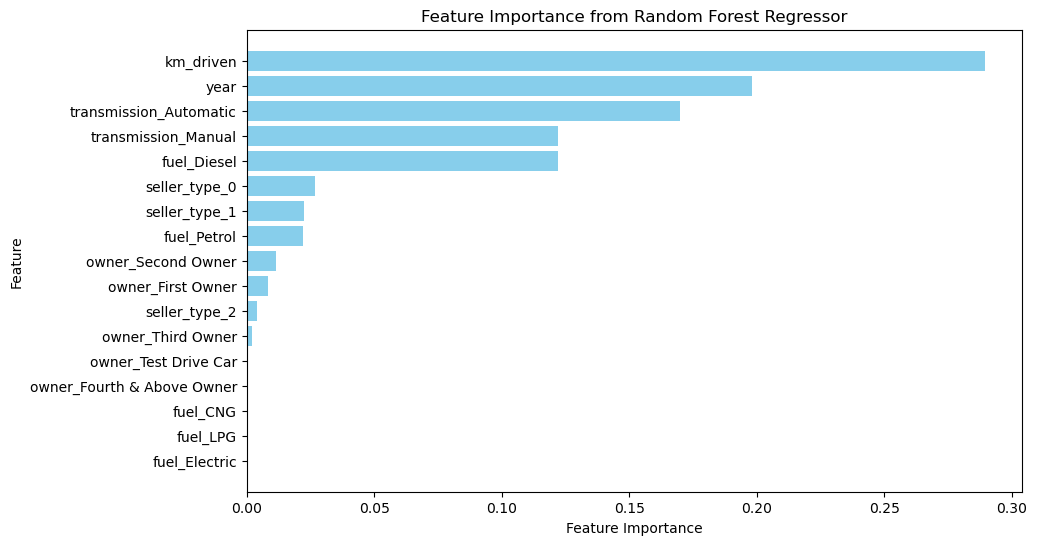

In [18]:
import matplotlib.pyplot as plt

regressor = model.named_steps['regressor']

categorical_transformer = model.named_steps['preprocessor'].named_transformers_['cat']
categorical_feature_names = categorical_transformer.get_feature_names_out(categorical_features)

all_feature_names = numerical_features + list(categorical_feature_names)

feature_importances = regressor.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To show the most important feature at the top
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest Regressor')
plt.show()

In [19]:
# Next Steps
# improving accuracy of the model
# Regression Enhancement using Feature importance score 
# Making it interactive to user to enter the car details

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assume 'data' contains the dataset as a DataFrame
df = pd.DataFrame(data)

# Select relevant features
X = df[['km_driven', 'year', 'fuel', 'transmission']]
y = df['selling_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define transformations
numerical_features = ['km_driven', 'year']
categorical_features = ['fuel', 'transmission']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(categories=[['Diesel'], ['Automatic', 'Manual']], handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

new_car = pd.DataFrame({
    'year': [2015],
    'km_driven': [50000],
    'fuel': ['Diesel'],
    'seller_type': ['Individual'],
    'transmission': ['Manual'],
    'owner': ['First Owner']
})

predicted_price = model.predict(new_car)
print(f"Predicted Selling Price: {predicted_price[0] // 84}")


R-squared Score: 0.4931864670585301
Predicted Selling Price: 6093.0


Linear Regression R-squared Score: 0.4483
Decision Tree R-squared Score: 0.4318
Random Forest R-squared Score: 0.5206
Gradient Boosting R-squared Score: 0.5395
XGBoost R-squared Score: 0.5215


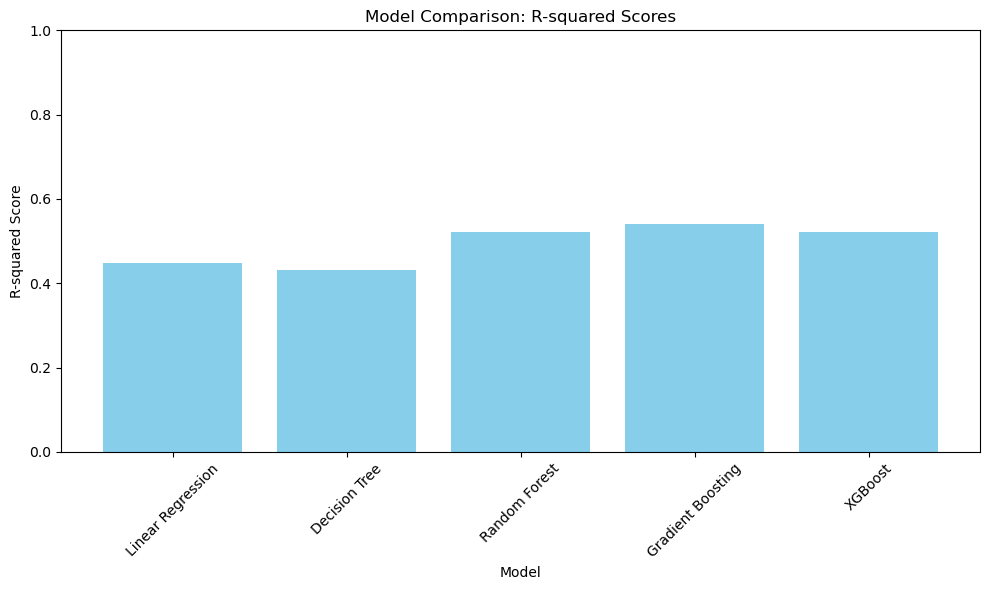

Predicted Selling Price using Gradient Boosting: 568110.50


In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
df = pd.DataFrame(data)

# Define features and target variable
X = df.drop(['selling_price', 'name'], axis=1)
y = df['selling_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps
numerical_features = ['year', 'km_driven']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror')
}

# Store R-squared scores
scores = {}

# Train and evaluate each model
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    scores[name] = r2
    print(f"{name} R-squared Score: {r2:.4f}")

# Visualize model performance
plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('Model Comparison: R-squared Scores')
plt.ylim(0, 1)  # Adjust scale as needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Predict with the best model
best_model_name = max(scores, key=scores.get)
best_model = models[best_model_name]
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model)
])
best_pipeline.fit(X_train, y_train)

# Predicting for a new car
new_car = pd.DataFrame({
    'year': [2015],
    'km_driven': [50000],
    'fuel': ['Diesel'],
    'seller_type': ['Individual'],
    'transmission': ['Manual'],
    'owner': ['First Owner']
})

predicted_price = best_pipeline.predict(new_car)
print(f"Predicted Selling Price using {best_model_name}: {predicted_price[0]:.2f}")


In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
df = pd.DataFrame(data)

# Define features and target variable
X = df.drop(['selling_price', 'name'], axis=1)
y = df['selling_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define preprocessing steps
numerical_features = ['year', 'km_driven']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models and hyperparameter grids
models_and_parameters = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(random_state=42),
        'params': {
            'regressor__max_depth': [None, 10, 20, 30],
            'regressor__min_samples_split': [2, 10, 20]
        }
    },
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'regressor__n_estimators': [100, 200, 300],
            'regressor__max_depth': [None, 10, 20],
            'regressor__min_samples_split': [2, 5, 10]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'regressor__n_estimators': [100, 200],
            'regressor__learning_rate': [0.01, 0.1, 0.2],
            'regressor__max_depth': [3, 5, 10]
        }
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, objective='reg:squarederror'),
        'params': {
            'regressor__n_estimators': [100, 200],
            'regressor__learning_rate': [0.01, 0.1, 0.2],
            'regressor__max_depth': [3, 5, 10]
        }
    }
}

# Store R-squared scores
scores = {}
best_params = {}

# Train and evaluate each model
for name, setup in models_and_parameters.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', setup['model'])
    ])
    
    grid_search = GridSearchCV(pipeline, setup['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    scores[name] = r2
    best_params[name] = grid_search.best_params_
    print(f"{name} Best Parameters: {grid_search.best_params_}")
    print(f"{name} R-squared Score: {r2:.4f}")

# Visualize model performance
plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('R-squared Score')
plt.title('Model Comparison After Hyperparameter Tuning')
plt.ylim(0, 1)  # Adjust scale as needed
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Predict with the best model
best_model_name = max(scores, key=scores.get)
print(f"Best Model: {best_model_name}")
print(f"Best Parameters for {best_model_name}: {best_params[best_model_name]}")

best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', models_and_parameters[best_model_name]['model'])
])
best_pipeline.set_params(**best_params[best_model_name])
best_pipeline.fit(X_train, y_train)

# Predicting for a new car
new_car = pd.DataFrame({
    'year': [2015],
    'km_driven': [50000],
    'fuel': ['Diesel'],
    'seller_type': ['Individual'],
    'transmission': ['Manual'],
    'owner': ['First Owner']
})

predicted_price = best_pipeline.predict(new_car)
print(f"Predicted Selling Price using {best_model_name}: {predicted_price[0]:.2f}")


Linear Regression Best Parameters: {}
Linear Regression R-squared Score: 0.4483
Decision Tree Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 20}
Decision Tree R-squared Score: 0.4971
